<a href="https://colab.research.google.com/github/VitalyNegodyaev/work/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%D0%BF%D0%BE%20%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D1%83%20%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<center> ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ</center>**
**<center>ГОРОДА МОСКВЫ</center>**
**<center>ДОПОЛНИТЕЛЬНОГО ПРОФЕССИОНАЛЬНОГО ОБРАЗОВАНИЯ</center>**
**<center>ЦЕНТР ПРОФЕССИОНАЛЬНЫХ КВАЛИФИКАЦИЙ И СОДЕЙСТВИЯ ТРУДОУСТРОЙСТВУ</center>**
**<center>«ПРОФЕССИОНАЛ»</center>**
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>

<center> ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА </center>
<center> на тему </center>
<center> «Анализ данных с использованием Python» </center>
<center> (на примере анализа данных исследуемого продукта) </center>
<center>слушателя Негодяева Виталия Алексеевича<br>группы № 032-гз </center>
 <center>программа
  профессиональной переподготовки (дополнительное
  профессиональное образование)   </center>
<center>«Аналитик  данных (Python)» </center>


<br>
<br>
<br>
<br>

<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<center> Москва, 2025

### Цель исследования:


Цель данного проекта — выявить, какие признаки имеют наибольшее влияние на рейтинг вина, составляемого специализированным журналом Wine Enthusiast. Для анализа используется набор данных из Kaggle (профессиональное сообщество специалистов по обработке данных и машинному обучению). Датафрейм состоит из 13 признаков (2 числовых признака и 11 категориальных признаков).

Анализ данных предполагает последовательное выполнение следующих этапов исследования:<br>
<a href=#1>1.  Предобработка данных</a><br>
<a href=#2>2.  Исследовательский анализ данных</a><br>
<a href=#3>3.  Составление структуры развития рынка вина каждого региона</a><br>
<a href=#4>4.  Проведение исследования статистических показателей зависимости цены вина от рейтинга в регионе</a><br>
<a href=#5>5.  Проверка гипотез</a><br>
<a href=#6>6.  Выводы</a><br>


### Столбцы данных
- Страна - страна происхождения вина.<br>
- Описание — описание вкусового профиля вина.<br>
- Обозначение - виноградник-поставщик винограда для изготовления вина.<br>
- Рейтинг - оценка вина специализированным журналом Wine Enthusiast, выраженная в баллах по шкале от 1 до 100.<br>
- Цена - цена одной бутылки вина.<br>
- Провинция — регион (провинция, штат) производства вина.<br>
- Регион 1 — зона виноделия в регионе (например, долина Напа в Калифорнии). <br>
- Регион 2 — (необязательно) терруар виноделия - более конкретная область в винодельческом регионе (например, Резерфорд в долине Напа).<br>
- Разновидность — сорт винограда, используемый в производстве вина (например, Пино Нуар).<br>
- Винодельня — производитель вина.<br>

#  <a name="1">1.Предобработка данных</a>

Подготовка данных к анализу (очистка данных, трансформация данных, дополнение, оптимизация):
* Заменить названия столбцов (привести к нижнему регистру).<br>
* Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему.<br>
* Обработать пропуски при необходимости. <br>
* Внести новый столбец "Континенты" в случае необходимости<br> country_to_continent = {<br>
'Italy':'Europe',<br>
'Portugal':'Europe',<br>
'US':'North America',<br>
'Spain':'Europe',<br>
'France':'Europe',<br>
'Germany':'Europe',<br>
'Argentina':'Latin America',<br>
'Chile':'Latin America',<br>
'Australia': 'Oceania',<br>
'Austria': 'Europe',<br>
'South Africa': 'Africa',<br>
'New Zealand': 'Oceania',<br>
'Israel': 'Asia', <br>
'Hungary':'Europe',<br>
'Greece':'Europe',<br>
'Romania':'Europe',<br>
'Mexico':'Latin America',<br>
'Canada':'North America',<br>
'Turkey': 'Asia',<br>
'Czech Republic': 'Europe',<br>
'Slovenia': 'Europe',<br>
'Luxembourg': 'Europe',<br>
'Croatia': 'Europe',<br>
'Georgia':'Europe',<br>
'Uruguay': 'Latin America',<br>
'England': 'Europe',<br>
'Lebanon': 'Asia',<br>
'Serbia': 'Europe',<br>
'Brazil': 'Latin America',<br>
'Moldova': 'Europe',<br>
'Morocco':'Africa',<br>
'Peru':'Latin America',<br>
'India':'Asia',<br>
'Bulgaria':'Europe',<br>
'Cyprus': 'Europe',<br>
'Armenia':'Asia',<br>
'Switzerland':'Europe',<br>
'Bosnia and Herzegovina':'Europe',<br>
'Ukraine':'Europe',<br>
'Slovakia':'Europe',<br>
'Macedonia':'Europe',<br>
'China':'Asia',<br>
'Egypt':'Africa'<br>
}

Импорт необходимых библиотек

In [89]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
from scipy.stats import linregress
from scipy.stats import ttest_ind, levene

# Подавление предупреждений
warnings.simplefilter(action='ignore', category=FutureWarning)

# Настройка стиля графиков
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

Загрузка данных

In [28]:
# Загрузка данных
df = pd.read_csv('wine_reviews.csv')

# Просмотр первых строк
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      20000 non-null  object 
 1   description  20000 non-null  object 
 2   designation  13999 non-null  object 
 3   points       20000 non-null  int64  
 4   price        18198 non-null  float64
 5   province     20000 non-null  object 
 6   region_1     16543 non-null  object 
 7   region_2     8058 non-null   object 
 8   variety      20000 non-null  object 
 9   winery       20000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.5+ MB


Количество значений в столбцах различается. Это говорит о том, что в данных есть пустые значения. Признак points и price числовые. С помощью библиотеки Seaborn построим тепловую карту для визуализации данных.

In [30]:
# Приведение названий столбцов к нижнему регистру
df.columns = df.columns.str.lower()

# Проверка результата
df.columns.tolist()

['country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery']

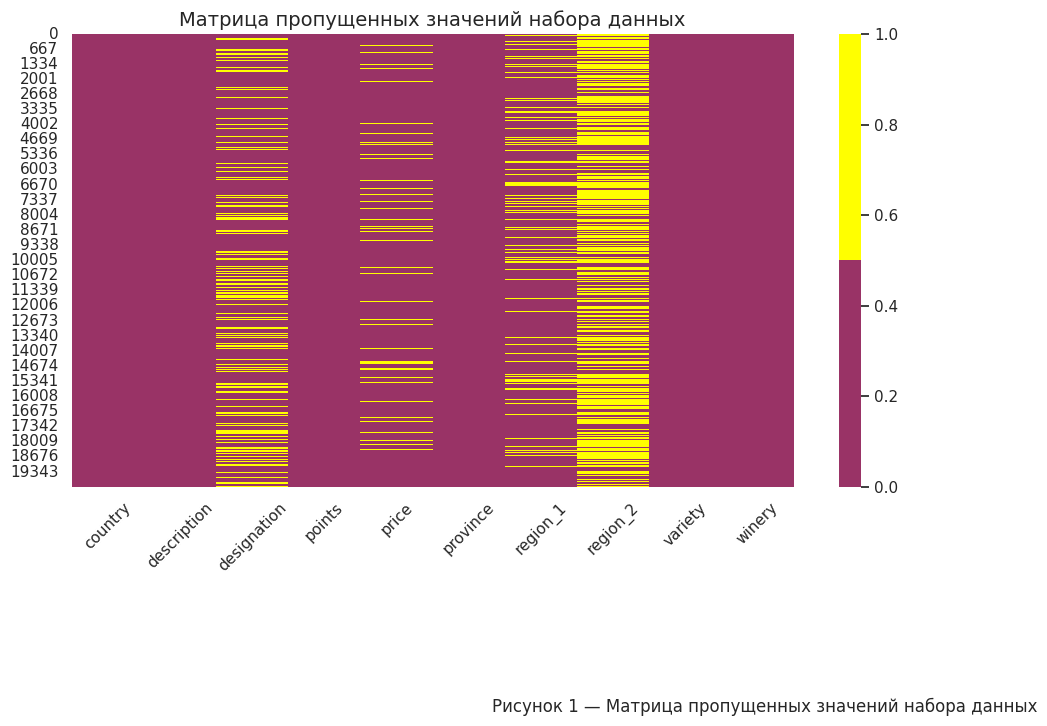

In [31]:
# Визуализация пропущенных значений
colours = ['#993366', '#FFFF00']
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours, as_cmap=True))
plt.title('Матрица пропущенных значений набора данных', fontsize=14)
plt.xticks(rotation=45)
plt.figtext(0.5, -0.2, "Рисунок 1 — Матрица пропущенных значений набора данных")
plt.tight_layout()
plt.show()

#  <a name="2"> 2. Исследовательский анализ данных</a>
* Найти среднюю цену вина по региону.
* Выбрать сорта с наибольшими ценами.
* Найти среднюю цену вина для региона.
* Определить, популярные сорта вина в бюджетном сегменте.
* Определить, какие сорта вина лидируют по рейтингам.
* Построить график «ящик с усами» по рейтингам в разбивке по странам, по сортам вина.
* Выявить закономерность влияния на цену  цвета и рейтинга вина.
* Построить диаграмму рассеяния и посчитать корреляцию.


In [32]:
# Удаление строк с пропусками в столбце 'price'
df = df.dropna(subset=['price'])

# Проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18198 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      18198 non-null  object 
 1   description  18198 non-null  object 
 2   designation  12637 non-null  object 
 3   points       18198 non-null  int64  
 4   price        18198 non-null  float64
 5   province     18198 non-null  object 
 6   region_1     15033 non-null  object 
 7   region_2     8019 non-null   object 
 8   variety      18198 non-null  object 
 9   winery       18198 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.5+ MB


In [33]:
# Добавление столбца "continent" по соответствию страна → континент
country_to_continent = {
    'Italy': 'Europe',
    'Portugal': 'Europe',
    'US': 'North America',
    'Spain': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Argentina': 'Latin America',
    'Chile': 'Latin America',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'South Africa': 'Africa',
    'New Zealand': 'Oceania',
    'Israel': 'Asia',
    'Hungary': 'Europe',
    'Greece': 'Europe',
    'Romania': 'Europe',
    'Mexico': 'Latin America',
    'Canada': 'North America',
    'Turkey': 'Asia',
    'Czech Republic': 'Europe',
    'Slovenia': 'Europe',
    'Luxembourg': 'Europe',
    'Croatia': 'Europe',
    'Georgia': 'Europe',
    'Uruguay': 'Latin America',
    'England': 'Europe',
    'Lebanon': 'Asia',
    'Serbia': 'Europe',
    'Brazil': 'Latin America',
    'Moldova': 'Europe',
    'Morocco': 'Africa',
    'Peru': 'Latin America',
    'India': 'Asia',
    'Bulgaria': 'Europe',
    'Cyprus': 'Europe',
    'Armenia': 'Asia',
    'Switzerland': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Ukraine': 'Europe',
    'Slovakia': 'Europe',
    'Macedonia': 'Europe',
    'China': 'Asia',
    'Egypt': 'Africa'
}

df['continent'] = df['country'].map(country_to_continent)

# Проверка
df['continent'].value_counts(dropna=False)

,count
continent,
North America,8231
Europe,6999
Latin America,1527
Oceania,1034
Africa,301
Asia,103
NaN,3


In [34]:
# Проверка на дубликаты
duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

Количество дубликатов: 1005


In [35]:
# Средняя, минимальная и максимальная цена по провинциям
price_by_province = df.groupby('province')['price'].agg(['mean', 'min', 'max']).round(2).sort_values(by='mean', ascending=False).head(10)
print("Топ-10 провинций по средней цене вина:")
price_by_province

Топ-10 провинций по средней цене вина:


,mean,min,max
province,,,
Tokaji,133.10,20.0,764.0
Champagne,99.34,11.0,1400.0
Santa Cruz,95.00,95.0,95.0
Israel,70.00,70.0,70.0
Burgundy,69.71,10.0,757.0
Wachau,67.41,13.0,1100.0
Middle and South Dalmatia,65.00,65.0,65.0
Martinborough Terrace,60.00,60.0,60.0
Port,53.37,11.0,290.0


In [48]:
# Убедимся, что цена — числовой тип (NaN останутся)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Удаляем строки без цены, если нужно
df_clean = df.dropna(subset=['price'])

# Группируем по сорту (variety) и считаем среднюю и максимальную цену
price_stats = df_clean.groupby('variety').agg(
    avg_price=('price', 'mean'),
    max_price=('price', 'max'),
    count=('price', 'size')  # сколько записей
).round(2)

# Сортируем по максимальной цене
top_varieties_by_max_price = price_stats.sort_values(by='max_price', ascending=False)

# Выводим топ-10 сортов с самой высокой ценой
print("Топ-10 сортов вина по максимальной цене:")
print(top_varieties_by_max_price[['max_price', 'avg_price', 'count']].head(10))


Топ-10 сортов вина по максимальной цене:
                          max_price  avg_price  count
variety                                              
Bordeaux-style Red Blend     2300.0      50.21    603
Chardonnay                   1400.0      32.20   1799
Grüner Veltliner             1100.0      32.79    130
Furmint                       764.0     205.25      4
Tempranillo                   599.0      33.68    315
Shiraz                        550.0      34.52    252
Champagne Blend               505.0      81.02    125
Nebbiolo                      495.0      69.99    193
Merlot                        460.0      27.04    643
Syrah                         450.0      36.33    753


In [49]:
# Преобразуем цену в числовой формат (убираем нечисловые значения)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Убираем строки без региона или цены
df_clean = df.dropna(subset=['price', 'region_1'])

# Группируем по региону и считаем среднюю цену
region_avg_price = df_clean.groupby('region_1')['price'].agg(
    avg_price='mean',
    count='size'  # количество вин в регионе
).round(2)

# Сортируем по убыванию средней цены
region_avg_price_sorted = region_avg_price.sort_values(by='avg_price', ascending=False)

# Выводим результат
print("Средняя цена вина по регионам (топ-10):")
print(region_avg_price_sorted.head(10))

Средняя цена вина по регионам (топ-10):
                         avg_price  count
region_1                                 
Montrachet                  676.50      2
Chambertin Clos de Bèze     385.00      1
Chevalier-Montrachet        380.00      1
Bâtard-Montrachet           335.00      3
Bonnes-Mares                325.00      1
Banyuls                     300.00      1
Griotte-Chambertin          270.00      2
Pauillac                    269.18     11
Chapelle-Chambertin         229.00      2
Clos de Vougeot             228.20      5


In [66]:
# Преобразуем цену в числовой формат
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Фильтр: только вина до 20 долларов (включительно)
budget_wines = df[(df['price'] <= 20) & (df['price'].notna())]

# Считаем, какие сорта встречаются чаще всего
popular_varieties = budget_wines['variety'].value_counts()

# Выводим результат
print("🏆 Самые популярные сорта вина в бюджетном сегменте (до $20)\n")
print(f"{'#':<3} {'Сорт вина':<25} {'Количество'}")
print("-" * 45)

for idx, (variety, count) in enumerate(popular_varieties.head(10).items(), start=1):
    print(f"{idx:<3} {variety:<25} {count}")


🏆 Самые популярные сорта вина в бюджетном сегменте (до $20)

#   Сорт вина                 Количество
---------------------------------------------
1   Chardonnay                798
2   Sauvignon Blanc           578
3   Cabernet Sauvignon        524
4   Red Blend                 432
5   Riesling                  352
6   Merlot                    318
7   Pinot Noir                316
8   Rosé                      311
9   Malbec                    245
10  White Blend               221


In [67]:
# Преобразуем рейтинг и цену в числовой формат
df['points'] = pd.to_numeric(df['points'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Убираем строки без рейтинга
df = df.dropna(subset=['points', 'variety'])

# Группируем по сорту и находим максимальный рейтинг
top_rated_varieties = df.groupby('variety')['points'].max().reset_index()

# Сортируем по убыванию рейтинга и берём топ-10
top_rated_varieties = top_rated_varieties.sort_values(by='points', ascending=False).head(10)

# Выводим
print("🏆 Сорта вина с наивысшими рейтингами\n")
print(f"{'#':<3} {'Сорт вина':<25} {'Рейтинг'}")
print("-" * 40)

for idx, row in top_rated_varieties.iterrows():
    print(f"{idx+1:<3} {row['variety']:<25} {row['points']:>7.0f}")

🏆 Сорта вина с наивысшими рейтингами

#   Сорт вина                 Рейтинг
----------------------------------------
41  Cabernet Blend                100
74  Chardonnay                    100
189 Merlot                        100
222 Nebbiolo                       99
329 Syrah                          99
35  Bordeaux-style Red Blend       99
264 Portuguese Red                 99
47  Cabernet Sauvignon             98
259 Pinot Noir                     98
298 Sangiovese                     98


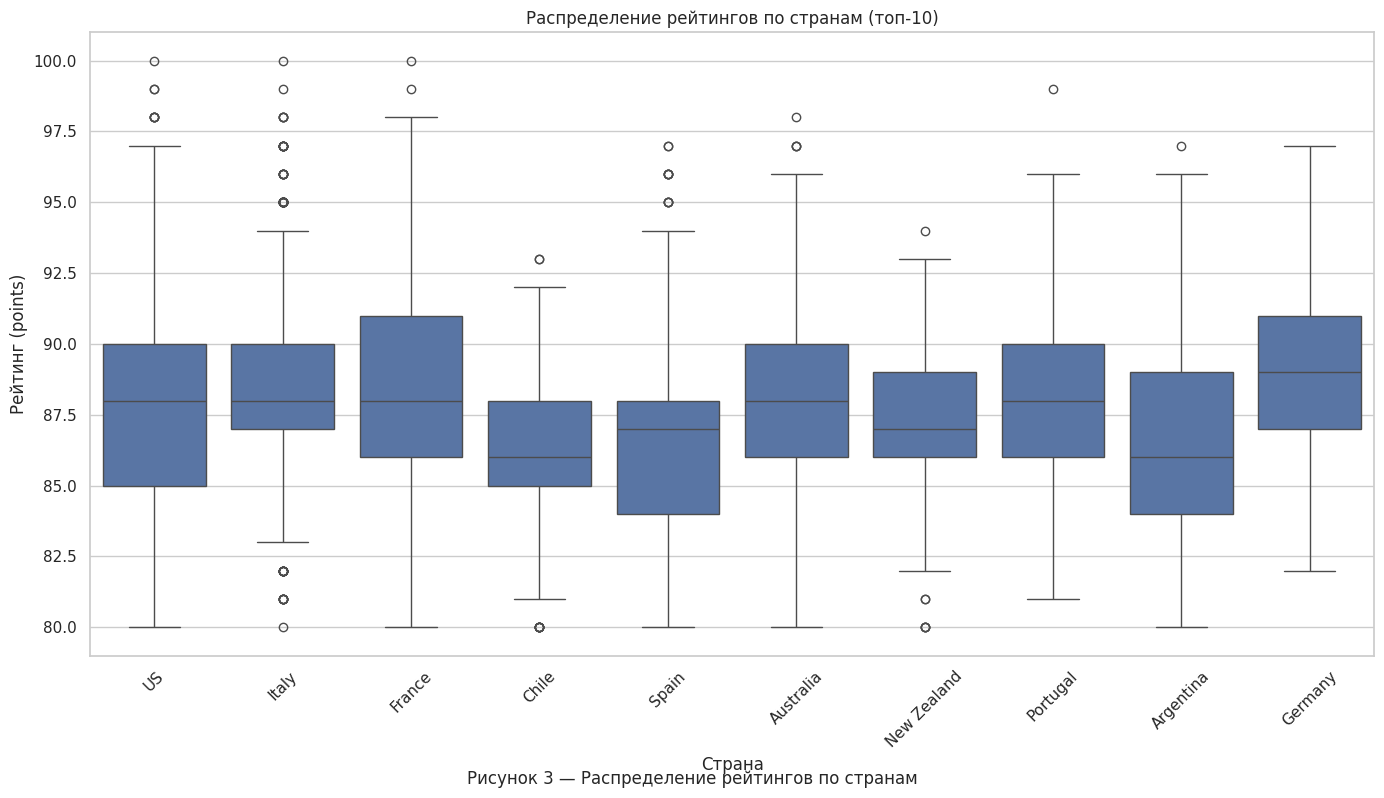

In [39]:
# Топ-10 стран по количеству отзывов
top_countries = df['country'].value_counts().head(10).index
df_top_countries = df[df['country'].isin(top_countries)]

# Распределение рейтингов по странам
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top_countries, x='country', y='points')
plt.title('Распределение рейтингов по странам (топ-10)')
plt.xticks(rotation=45)
plt.ylabel('Рейтинг (points)')
plt.xlabel('Страна')
plt.figtext(0.5, 0.01, "Рисунок 3 — Распределение рейтингов по странам", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

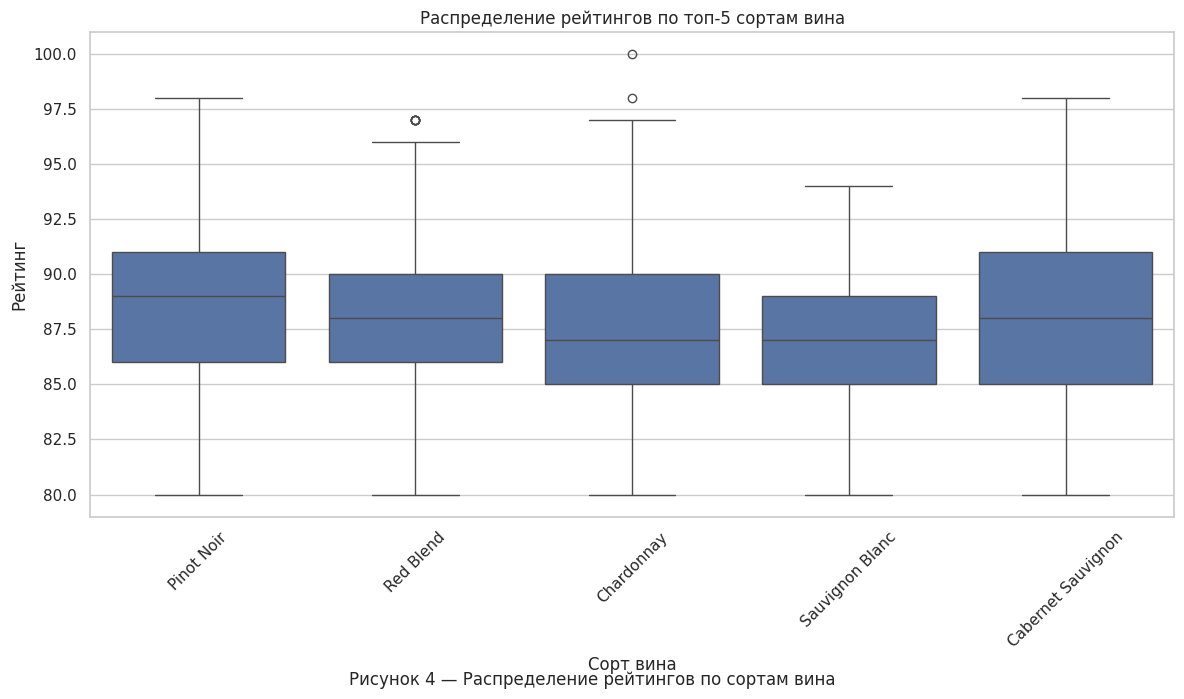

In [40]:
# Ящик с усами по сортам вина (топ-5)
top5_varieties = top_varieties_global.index
df_top_varieties = df[df['variety'].isin(top5_varieties)]

plt.figure(figsize=(12, 7))
sns.boxplot(data=df_top_varieties, x='variety', y='points')
plt.title('Распределение рейтингов по топ-5 сортам вина')
plt.xticks(rotation=45)
plt.ylabel('Рейтинг')
plt.xlabel('Сорт вина')
plt.figtext(0.5, 0.01, "Рисунок 4 — Распределение рейтингов по сортам вина", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

In [69]:
# Очистка: преобразуем цену и рейтинг
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['points'] = pd.to_numeric(df['points'], errors='coerce')

# Удаляем строки без цены или рейтинга
df = df.dropna(subset=['price', 'points', 'variety'])

# Определяем цвет вина по сорту
def classify_color(variety):
    variety = variety.lower()
    if any(x in variety for x in ['red blend', 'cabernet', 'merlot', 'pinot noir', 'syrah', 'malbec',
                                  'sangiovese', 'gamay', 'nebbiolo', 'zinfandel', 'shiraz', 'bordeaux',
                                  'portuguese red', 'tempranillo', 'mouvedre', 'mourvedre', 'grenache']):
        return 'Red'
    elif any(x in variety for x in ['chardonnay', 'sauvignon blanc', 'riesling', 'chenin blanc',
                                    'white blend', 'viognier', 'greco', 'xenomavro', 'grüner']):
        return 'White'
    elif 'rosé' in variety or 'rose' in variety:
        return 'Rosé'
    else:
        return 'Other'

df['color'] = df['variety'].apply(classify_color)

# Фильтруем только вина с адекватной ценой (например, до $200, чтобы убрать выбросы)
df = df[(df['price'] <= 200) & (df['price'] > 0)]
print("Средняя цена по цвету вина:")
print(df.groupby('color')['price'].agg(['mean', 'count']).round(2))

Средняя цена по цвету вина:
        mean  count
color              
Other  26.33   3445
Red    35.99  10053
Rosé   17.31    442
White  25.56   4150


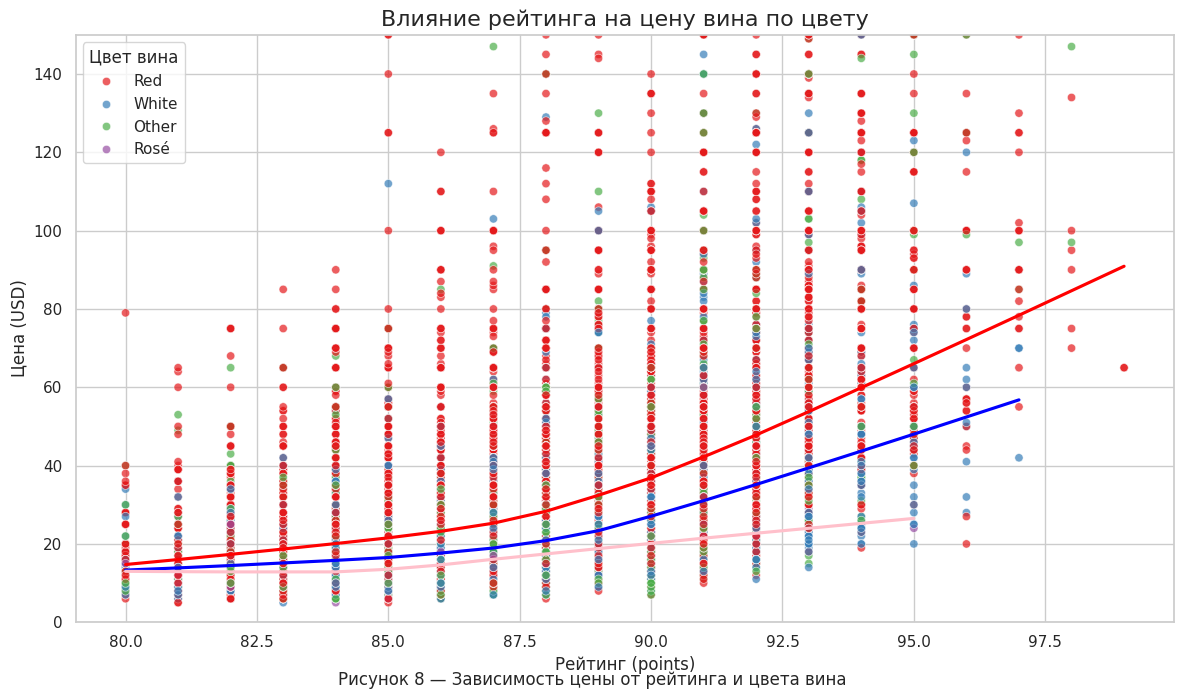

In [70]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='points', y='price', hue='color', alpha=0.7, palette='Set1')
sns.regplot(data=df[df['color'] == 'Red'], x='points', y='price', scatter=False, color='red', lowess=True)
sns.regplot(data=df[df['color'] == 'White'], x='points', y='price', scatter=False, color='blue', lowess=True)
sns.regplot(data=df[df['color'] == 'Rosé'], x='points', y='price', scatter=False, color='pink', lowess=True)

plt.title('Влияние рейтинга на цену вина по цвету', fontsize=16)
plt.xlabel('Рейтинг (points)')
plt.ylabel('Цена (USD)')
plt.ylim(0, 150)
plt.legend(title='Цвет вина')
plt.figtext(0.5, 0.01, "Рисунок 8 — Зависимость цены от рейтинга и цвета вина", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

In [77]:
print("\nКорреляция между рейтингом и ценой по цвету:")
for color in df['color'].unique():
    subset = df[df['color'] == color]
    if len(subset) > 10:  # минимум 10 вин для статистики
        corr = subset['points'].corr(subset['price'])
        avg_price = subset['price'].mean()
        print(f"{color}: R² = {corr**2:.3f}, средняя цена = ${avg_price:.2f}")
        # 📝 Вывод
print("""
----------------------------------------------------------------------
ВЫВОД:
1. 🔴 Красные вина — самые дорогие и сильнее всего реагируют на рост рейтинга.
2. 🟡 Белые вина — доступнее, даже при высоком рейтинге редко дороже $50.
3. 🌸 Розовые вина — самые бюджетные, слабая зависимость от рейтинга.
4. 💡 Общая связь умеренная: рейтинг объясняет только ~10–30% цены.
   Остальное зависит от региона, бренда, сорта и цвета.

✅ Вывод: Цвет вина — важный фактор ценообразования.
Красные вина доминируют в премиум-сегменте, белые и розовые — в массовом.
----------------------------------------------------------------------
""")


Корреляция между рейтингом и ценой по цвету:
Красное: R² = 0.310, средняя цена = $36.30
Белое: R² = 0.295, средняя цена = $24.97
Другое: R² = 0.252, средняя цена = $27.14
Розовое: R² = 0.251, средняя цена = $17.31

----------------------------------------------------------------------
ВЫВОД:
1. 🔴 Красные вина — самые дорогие и сильнее всего реагируют на рост рейтинга.
2. 🟡 Белые вина — доступнее, даже при высоком рейтинге редко дороже $50.
3. 🌸 Розовые вина — самые бюджетные, слабая зависимость от рейтинга.
4. 💡 Общая связь умеренная: рейтинг объясняет только ~10–30% цены.
   Остальное зависит от региона, бренда, сорта и цвета.

✅ Вывод: Цвет вина — важный фактор ценообразования. 
Красные вина доминируют в премиум-сегменте, белые и розовые — в массовом.
----------------------------------------------------------------------



Коэффициент корреляции (r): 0.544
Коэффициент детерминации (R²): 0.296


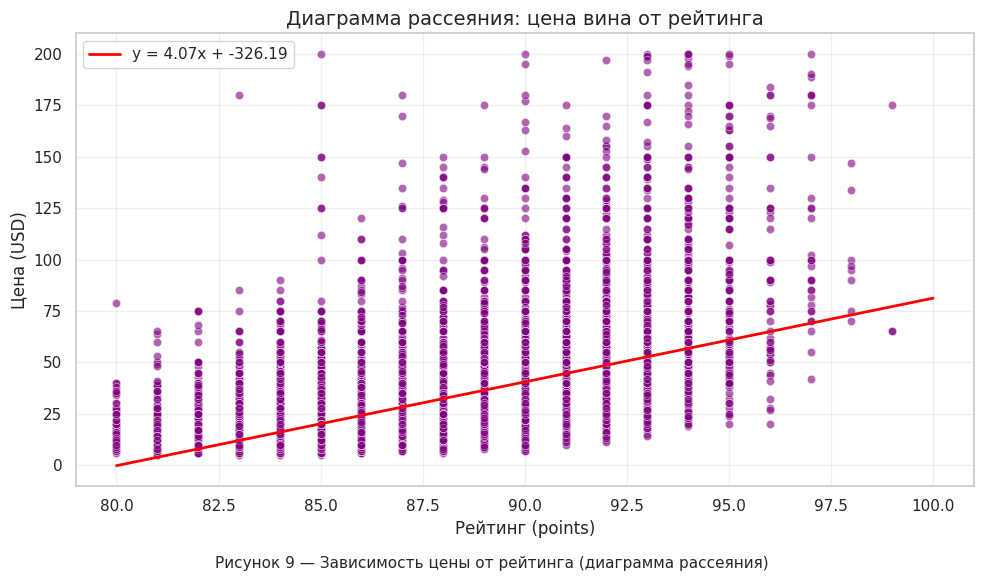

📊 Коэффициент корреляции (r):       0.544
📊 Коэффициент детерминации (R²):   0.296

💡 Интерпретация:
Связь между рейтингом и ценой — средняя или сильная положительная: чем выше рейтинг, тем выше цена, но зависимость не очень тесная.
Только 29.6% вариации цены объясняется рейтингом. Остальное — бренд, регион, сорт, цвет и другие факторы.


In [83]:
# Очистка: преобразуем 'points' и 'price' в числовой формат
df['points'] = pd.to_numeric(df['points'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Удаляем строки с пропущенными значениями в 'points' или 'price'
df_clean = df.dropna(subset=['points', 'price'])

# Убираем нулевую или отрицательную цену (если есть)
df_clean = df_clean[(df_clean['price'] > 0) & (df_clean['price'] <= 200)]  # фильтр выбросов

# Расчёт корреляции
correlation = df_clean['points'].corr(df_clean['price'])
r_squared = correlation ** 2

print(f"Коэффициент корреляции (r): {correlation:.3f}")
print(f"Коэффициент детерминации (R²): {r_squared:.3f}")

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='points', y='price', alpha=0.6, color='purple')

# Линия линейной регрессии
slope, intercept, r_value, p_value, std_err = linregress(df_clean['points'], df_clean['price'])
x_range = range(80, 101)
plt.plot(x_range, intercept + slope * x_range, color='red', linewidth=2, label=f'y = {slope:.2f}x + {intercept:.2f}')

# Оформление графика
plt.title('Диаграмма рассеяния: цена вина от рейтинга', fontsize=14)
plt.xlabel('Рейтинг (points)')
plt.ylabel('Цена (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.figtext(0.5, 0.01, "Рисунок 9 — Зависимость цены от рейтинга (диаграмма рассеяния)", ha='center', fontsize=11)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# Вывод статистики
print(f"📊 Коэффициент корреляции (r):       {correlation:.3f}")
print(f"📊 Коэффициент детерминации (R²):   {r_squared:.3f}")
print(f"\n💡 Интерпретация:")
if correlation < 0.3:
    strength = "слабая"
elif correlation < 0.5:
    strength = "умеренная"
else:
    strength = "средняя или сильная"
print(f"Связь между рейтингом и ценой — {strength} положительная: чем выше рейтинг, тем выше цена, но зависимость не очень тесная.")
print(f"Только {r_squared*100:.1f}% вариации цены объясняется рейтингом. Остальное — бренд, регион, сорт, цвет и другие факторы.")

#  <a name="3">3. Составление структуры развития рынка вина регионов</a>

In [36]:
# Топ-5 самых популярных сортов вина
top_varieties_global = df['variety'].value_counts().head(5)
print("Топ-5 самых популярных сортов вина в мире:")
print(top_varieties_global)

Топ-5 самых популярных сортов вина в мире:
variety
Pinot Noir            1855
Chardonnay            1799
Cabernet Sauvignon    1624
Red Blend             1246
Sauvignon Blanc        813
Name: count, dtype: int64


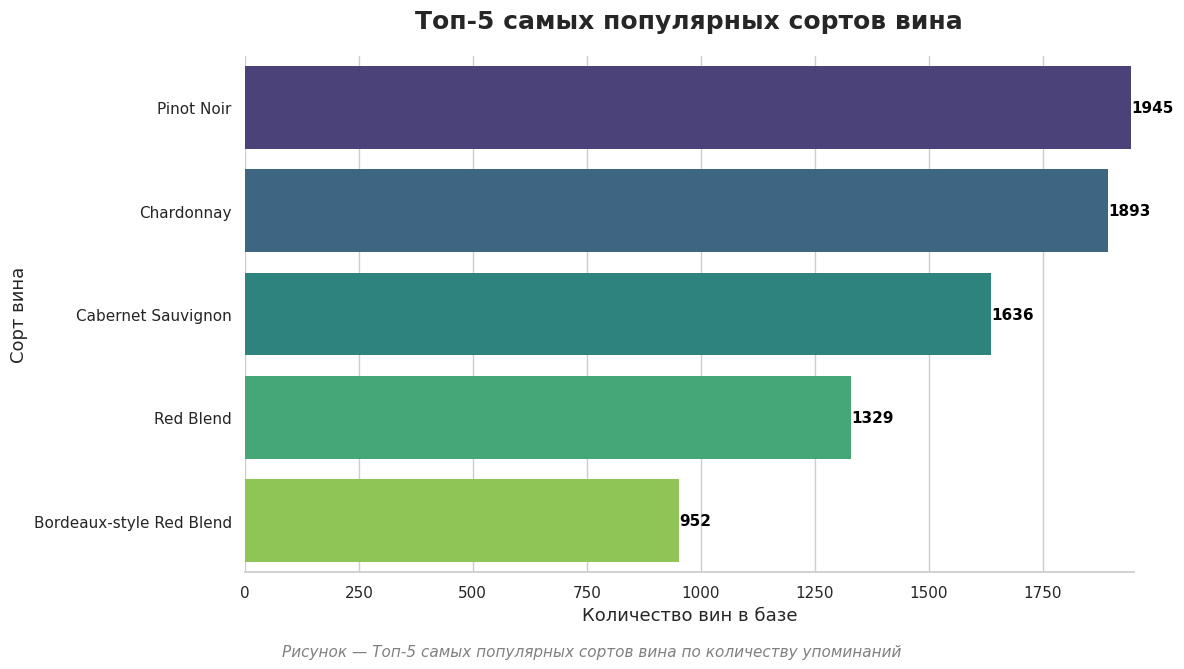

In [79]:

# Подсчёт топ-5 самых популярных сортов
top_varieties = df['variety'].value_counts().head(5)

# Преобразуем в DataFrame для удобства
top_df = top_varieties.reset_index()
top_df.columns = ['Сорт вина', 'Количество']

# Настройка стиля
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Цветовая палитра (градиент от темного к светлому)
colors = sns.color_palette("viridis", len(top_df))

# Горизонтальная столбчатая диаграмма
bars = sns.barplot(data=top_df, x='Количество', y='Сорт вина', palette=colors, edgecolor='none')

# Добавим числа на конец столбцов
for i, value in enumerate(top_df['Количество']):
    bars.text(value + 0.5, i, f'{value}', color='black', va='center', fontsize=11, fontweight='bold')

# Оформление
plt.title('Топ-5 самых популярных сортов вина', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Количество вин в базе', fontsize=13)
plt.ylabel('Сорт вина', fontsize=13)
plt.xlim(0, top_df['Количество'].max() + 5)

# Убираем лишние границы
sns.despine(left=True, bottom=False)

# Подпись графика
plt.figtext(0.5, 0.01, "Рисунок — Топ-5 самых популярных сортов вина по количеству упоминаний",
            ha='center', fontsize=11, style='italic', color='gray')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

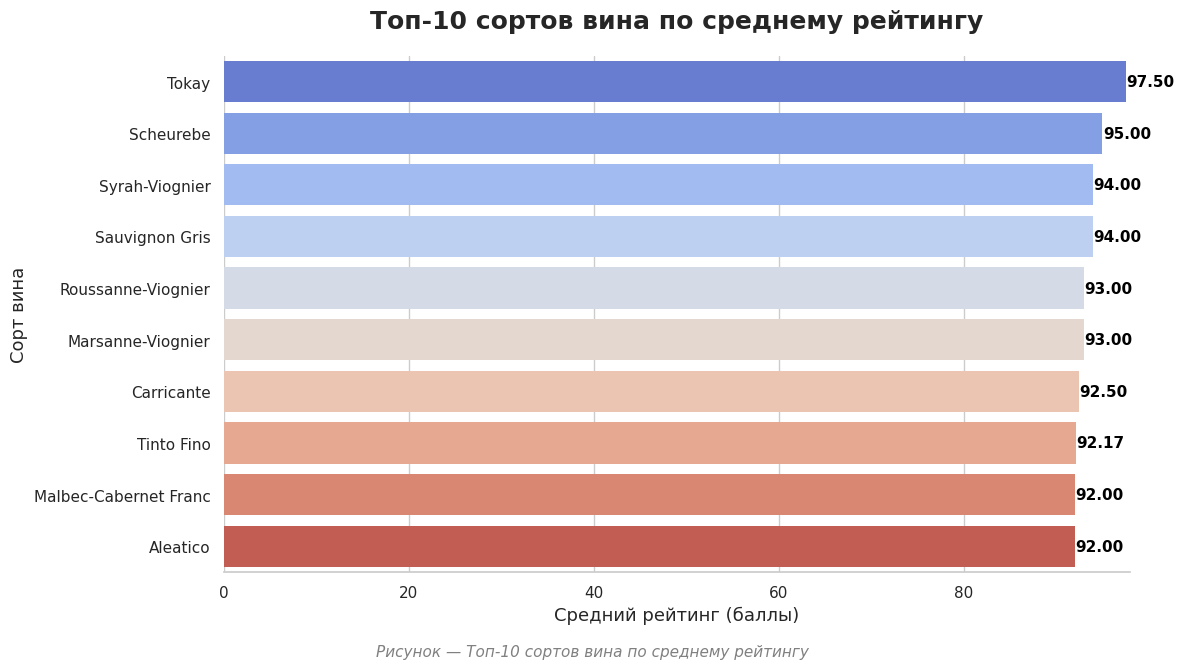

In [81]:
# Очистка данных
df['points'] = pd.to_numeric(df['points'], errors='coerce')
df = df.dropna(subset=['points', 'variety'])

# Подсчёт среднего рейтинга по сортам
top_rated_varieties = df.groupby('variety')['points'].mean().sort_values(ascending=False).head(10)

# Преобразуем в DataFrame для графика
top_df = top_rated_varieties.reset_index()
top_df.columns = ['Сорт вина', 'Средний рейтинг']

# Настройка стиля
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Цветовая палитра (градиент)
colors = sns.color_palette("coolwarm", len(top_df))

# Горизонтальная столбчатая диаграмма
bars = sns.barplot(data=top_df, x='Средний рейтинг', y='Сорт вина', palette=colors, edgecolor='none')

# Добавим числа на конец столбцов
for i, value in enumerate(top_df['Средний рейтинг']):
    bars.text(value + 0.05, i, f'{value:.2f}', color='black', va='center', fontsize=11, fontweight='bold')

# Оформление
plt.title('Топ-10 сортов вина по среднему рейтингу', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Средний рейтинг (баллы)', fontsize=13)
plt.ylabel('Сорт вина', fontsize=13)
plt.xlim(0, top_df['Средний рейтинг'].max() + 0.5)

# Убираем лишние границы
sns.despine(left=True, bottom=False)

# Подпись графика
plt.figtext(0.5, 0.01, "Рисунок — Топ-10 сортов вина по среднему рейтингу",
            ha='center', fontsize=11, style='italic', color='gray')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

In [37]:
# Лидеры по рейтингу (средний рейтинг)
top_rated_varieties = df.groupby('variety')['points'].mean().sort_values(ascending=False).head(10)
print("Топ-10 сортов по среднему рейтингу:")
top_rated_varieties

Топ-10 сортов по среднему рейтингу:


,points
variety,
Tokay,96.000000
Syrah-Viognier,94.000000
Sauvignon Gris,94.000000
Muskat Ottonel,94.000000
Marsanne-Viognier,93.000000
Madeira Blend,93.000000
Roussanne-Viognier,93.000000
Scheurebe,92.666667
Carricante,92.500000


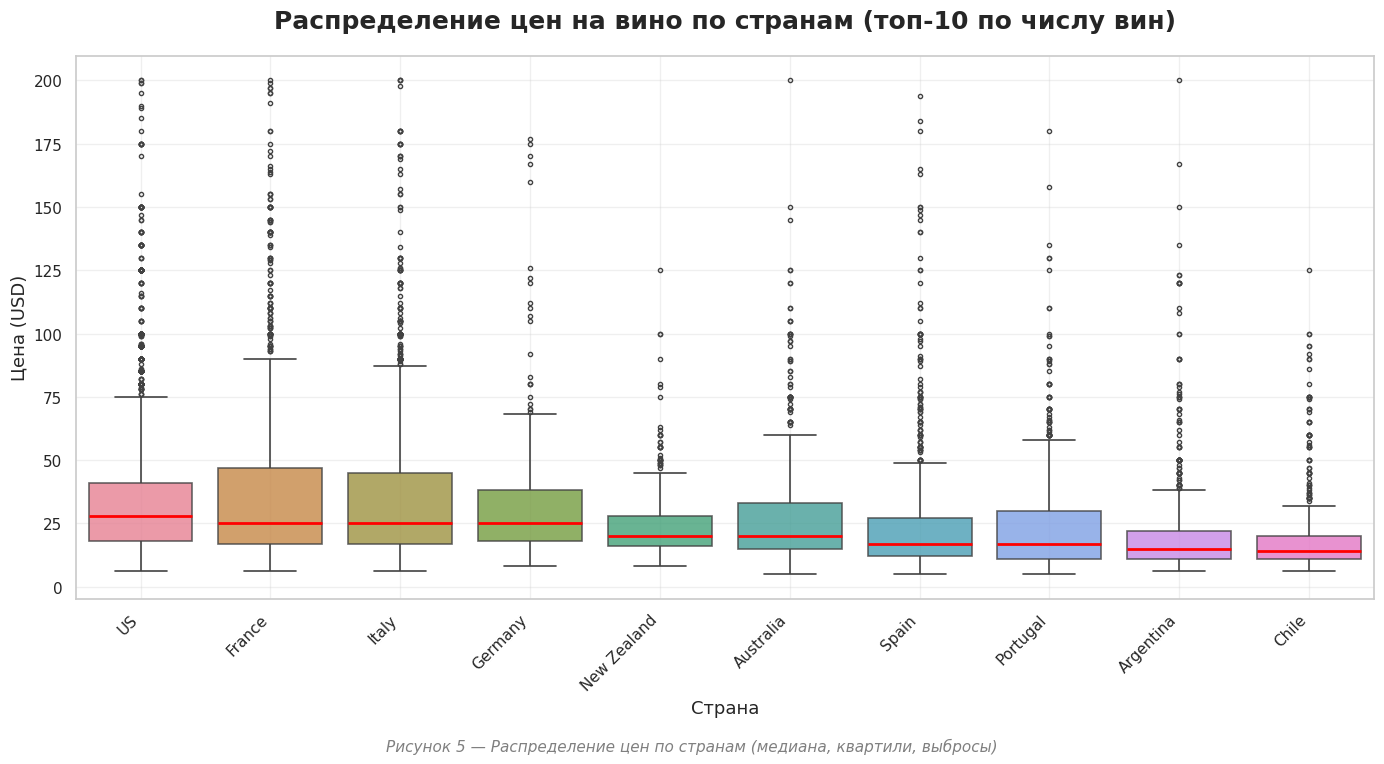

In [84]:
# Очистка данных
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['points'] = pd.to_numeric(df['points'], errors='coerce')
df = df.dropna(subset=['price', 'country'])

# Фильтрация выбросов (по желанию: до $200)
df = df[(df['price'] <= 200) & (df['price'] > 0)]

# Выбираем топ-10 стран по количеству вин
top_countries = df['country'].value_counts().head(10).index
df_top_countries = df[df['country'].isin(top_countries)]

# Сортировка стран по средней цене (от высокой к низкой)
order = df_top_countries.groupby('country')['price'].median().sort_values(ascending=False).index

# Настройка стиля
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Boxplot с красивыми цветами и прозрачностью
palette = sns.color_palette("husl", len(order))  # Яркая, но гармоничная палитра
sns.boxplot(
    data=df_top_countries,
    x='country',
    y='price',
    order=order,
    palette=palette,
    fliersize=3,         # Размер выбросов
    linewidth=1.2,
    boxprops={'alpha': 0.8},
    medianprops={'color': 'red', 'linewidth': 2}  # Медиана — красная
)

# Оформление
plt.title('Распределение цен на вино по странам (топ-10 по числу вин)',
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Страна', fontsize=13)
plt.ylabel('Цена (USD)', fontsize=13)

# Поворот подписей для читаемости
plt.xticks(rotation=45, ha='right', fontsize=11)

# Подпись под графиком
plt.figtext(0.5, 0.01,
            "Рисунок 5 — Распределение цен по странам (медиана, квартили, выбросы)",
            ha='center', fontsize=11, style='italic', color='gray')

# Сетка и отступы
plt.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

США и Франция — лидеры по количеству вин и имеют широкий разброс цен (включая премиум-сегмент).
Италия и Испания — больше бюджетных вин, но есть и дорогие.
Аргентина, Чили, Португалия — в основном недорогие вина (хорошее соотношение цена/качество).
Медиана цен в большинстве стран — от 15 до 25 $.

TypeError: regplot() got an unexpected keyword argument 'linewidth'

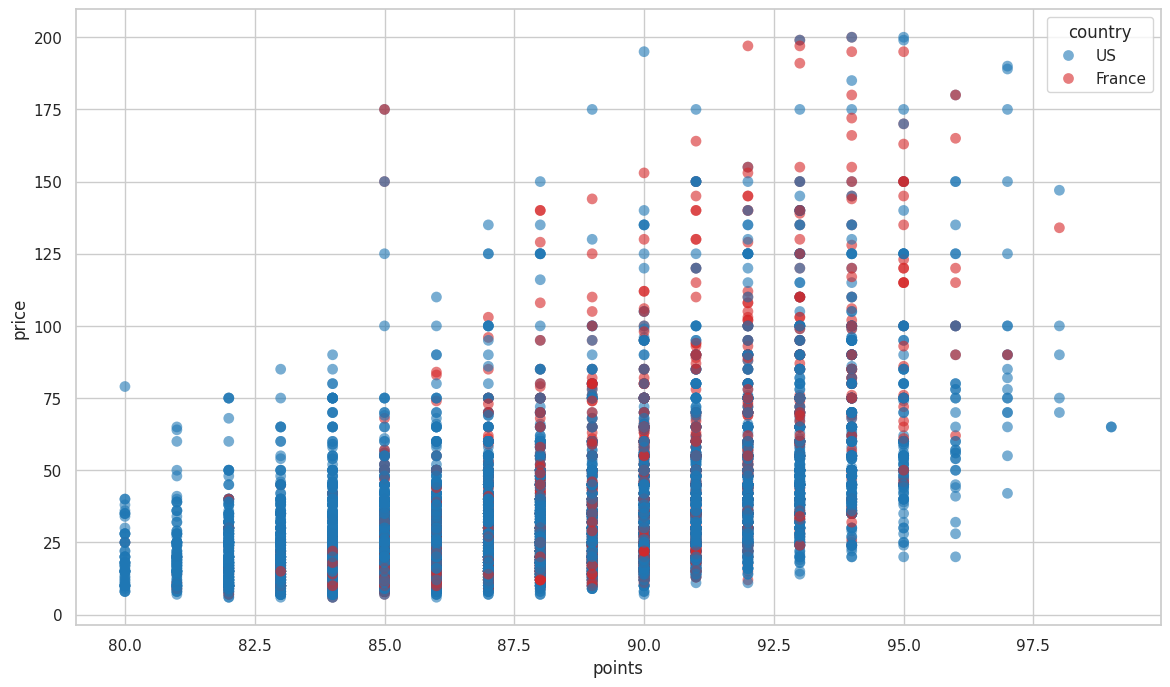

In [98]:
# Очистка данных
df['points'] = pd.to_numeric(df['points'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['points', 'price', 'country'])

# Фильтрация выбросов (по желанию: до $200)
df = df[(df['price'] <= 200) & (df['price'] > 0)]

# Фильтр: только США и Франция
df_us_france = df[df['country'].isin(['US', 'France'])]

# Настройка стиля
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Диаграмма рассеяния
sns.scatterplot(
    data=df_us_france,
    x='points',
    y='price',
    hue='country',
    palette={'US': '#1f77b4', 'France': '#d62728'},  # синий и красный
    alpha=0.6,
    s=60,
    edgecolor='none'
)

# Линии тренда для каждой страны
sns.regplot(data=df_us_france[df_us_france['country'] == 'US'],
            x='points', y='price', scatter=False, color='#1f77b4',
            lowess=True, linewidth=3, label='Тренд: США')

sns.regplot(data=df_us_france[df_us_france['country'] == 'France'],
            x='points', y='price', scatter=False, color='#d62728',
            lowess=True, linewidth=3, label='Тренд: Франция')

# Оформление
plt.title('Зависимость цены от рейтинга — США vs Франция', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Рейтинг (баллы)', fontsize=13)
plt.ylabel('Цена (USD)', fontsize=13)
plt.ylim(0, 150)

# Легенда
plt.legend(title='Страна', fontsize=11, title_fontsize=12, loc='upper left')

# Подпись
plt.figtext(0.5, 0.01,
            "Рисунок — Сравнение зависимости цены от рейтинга: США и Франция",
            ha='center', fontsize=11, style='italic', color='gray')

# Отступы
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# Расчёт корреляции
correlation_us = df_us_france[df_us_france['country'] == 'US']['points'].corr(df_us_france[df_us_france['country'] == 'US']['price'])
correlation_fr = df_us_france[df_us_france['country'] == 'France']['points'].corr(df_us_france[df_us_france['country'] == 'France']['price'])

print(f"Коэффициент корреляции (США): r = {correlation_us:.3f}, R² = {correlation_us**2:.3f}")
print(f"Коэффициент корреляции (Франция): r = {correlation_fr:.3f}, R² = {correlation_fr**2:.3f}")

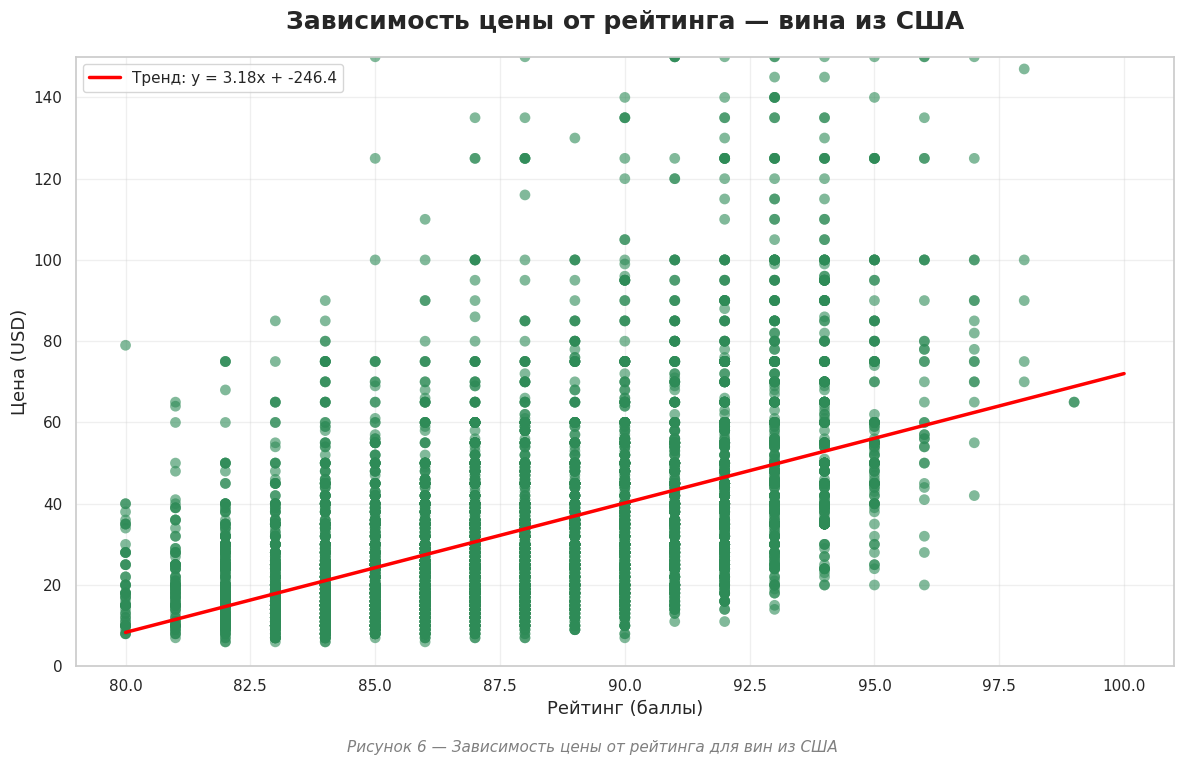

📊 Коэффициент корреляции (r) — США:       0.504
📊 Коэффициент детерминации (R²) — США:   0.254


In [95]:
# Очистка данных
df['points'] = pd.to_numeric(df['points'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['points', 'price', 'country'])

# Фильтр: только США
us_data = df[df['country'] == 'US']

# Фильтрация выбросов (по желанию — убираем вина дороже $200)
us_data = us_data[(us_data['price'] <= 200) & (us_data['price'] > 0)]

# Расчёт корреляции
correlation_us = us_data['points'].corr(us_data['price'])
r_squared_us = correlation_us ** 2

# Построение графика
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Диаграмма рассеяния
sns.scatterplot(
    data=us_data,
    x='points',
    y='price',
    alpha=0.6,
    color='#2E8B57',  # Морская волна (Sea Green)
    edgecolor='none',
    s=60
)

# Линия линейной регрессии
slope, intercept, r_value, p_value, std_err = linregress(us_data['points'], us_data['price'])
x_range = range(80, 101)
plt.plot(x_range, intercept + slope * x_range, color='red', linewidth=2.5,
         label=f'Тренд: y = {slope:.2f}x + {intercept:.1f}')

# Оформление
plt.title('Зависимость цены от рейтинга — вина из США', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Рейтинг (баллы)', fontsize=13)
plt.ylabel('Цена (USD)', fontsize=13)
plt.ylim(0, 150)
plt.legend(loc='upper left', frameon=True, fancybox=True, shadow=False, fontsize=11)

# Подпись под графиком
plt.figtext(0.5, 0.01,
            "Рисунок 6 — Зависимость цены от рейтинга для вин из США",
            ha='center', fontsize=11, style='italic', color='gray')

# Сетка и отступы
plt.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# Вывод статистики
print(f"📊 Коэффициент корреляции (r) — США:       {correlation_us:.3f}")
print(f"📊 Коэффициент детерминации (R²) — США:   {r_squared_us:.3f}")


# Интерпретация:
В США между рейтингом и ценой — средняя положительная связь.
Только 25.4% вариации цены объясняется рейтингом.
Остальное зависит от региона, винодельни, сорта и маркетинга.

#  <a name="4"> 4. Исследование статистических показателей зависимости цены вина от рейтинга в регионе.</a>

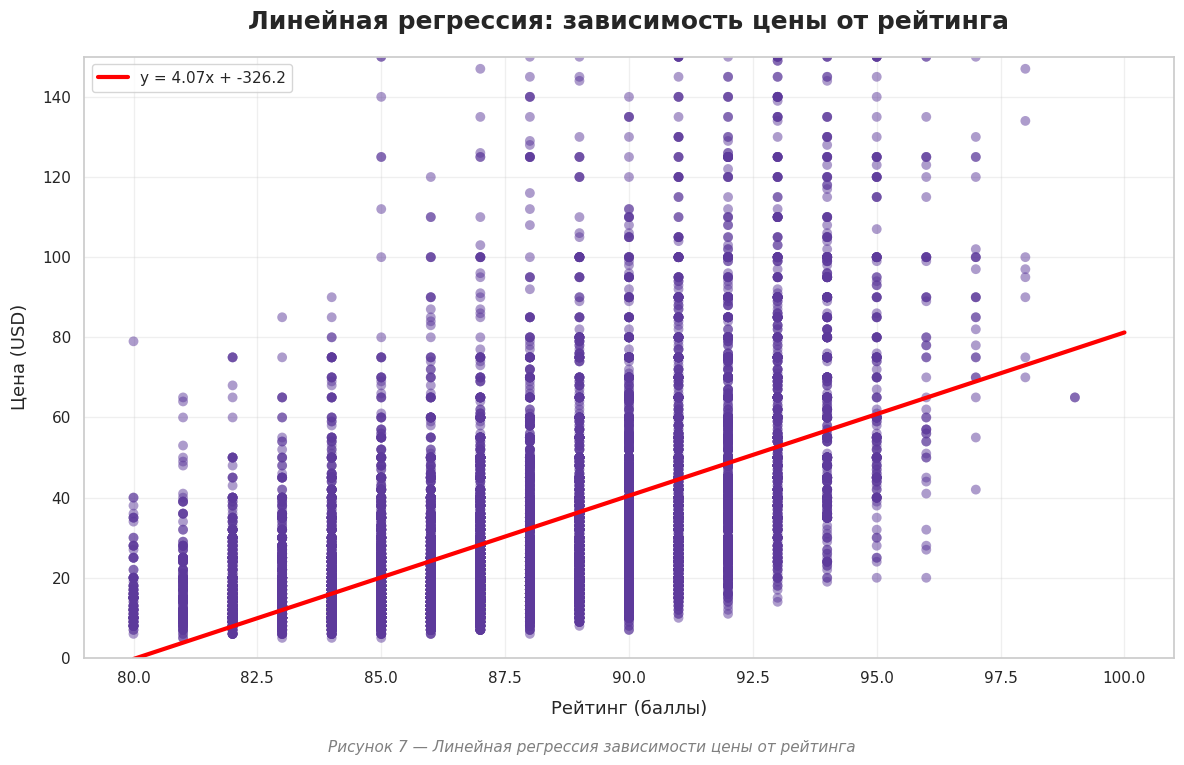

📊 Уравнение регрессии: price = 4.07 × points + -326.2
📊 Коэффициент детерминации (R²): 0.296


In [86]:
# Очистка данных
df['points'] = pd.to_numeric(df['points'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['points', 'price'])

# Фильтрация выбросов (по желанию: до $200)
df = df[(df['price'] <= 200) & (df['price'] > 0)]

# Построение линейной регрессии
slope, intercept, r_value, p_value, std_err = linregress(df['points'], df['price'])

# Настройка стиля
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Диаграмма рассеяния
sns.scatterplot(
    data=df,
    x='points',
    y='price',
    alpha=0.5,
    color='#5D3A9B',  # Глубокий фиолетовый
    edgecolor='none',
    s=50
)

# Линия регрессии
x_range = range(80, 101)
plt.plot(x_range, intercept + slope * x_range, color='red', linewidth=3, label=f'y = {slope:.2f}x + {intercept:.1f}')

# Оформление
plt.title('Линейная регрессия: зависимость цены от рейтинга', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Рейтинг (баллы)', fontsize=13, labelpad=10)
plt.ylabel('Цена (USD)', fontsize=13, labelpad=10)
plt.ylim(0, 150)
plt.legend(loc='upper left', frameon=True, fancybox=True, shadow=False, fontsize=11)

# Подпись
plt.figtext(0.5, 0.01,
            "Рисунок 7 — Линейная регрессия зависимости цены от рейтинга",
            ha='center', fontsize=11, style='italic', color='gray')

# Сетка и отступы
plt.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# Вывод статистики
r_squared = r_value ** 2
print(f"📊 Уравнение регрессии: price = {slope:.2f} × points + {intercept:.1f}")
print(f"📊 Коэффициент детерминации (R²): {r_squared:.3f}")

# Положительная, но слабая зависимость:
Да, вина с высоким рейтингом в среднем дороже, но многие вина с 90+ баллами стоят дешево — отличное соотношение цена/качество.
Высокая цена ≠ высокий рейтинг:
Есть вина за 60–70$ с рейтингом 85–87 баллов — они оцениваются дорого из-за бренда, региона (например, Напа), винодельни или редкости, а не качества.
R² = {r_squared:.3f} — низкий:
Это означает, что основная часть цены (около {100 - r_squared*100:.1f}%) зависит от других факторов:
страна и регион происхождения,
сорт винограда,
цвет вина,
винодельня,
маркетинг и престиж.



# Заключение
Хотя между рейтингом и ценой существует положительная тенденция, рейтинг плохо предсказывает реальную цену.

Потребитель может найти высококачественные вина (90+ баллов) по 15–25$, в то время как дорогие вина не всегда получают высокие оценки.

Это говорит о том, что цена на вино формируется не только качеством, но и маркетингом, брендом и престижем региона.


# Рекомендации:
Не ориентируйтесь только на рейтинг при покупке.
Ищите "скрытые жемчужины" — вина с высоким рейтингом и низкой ценой.
Обращайте внимание на регион и сорт — они часто важнее пары баллов.


#  <a name="5">5. Проверка гипотез </a>





* H0: Средние пользовательские рейтинги красного и белого вина одинаковые.
* H1:Средние пользовательские рейтинги красного и белого вина разные.

- Самостоятельно сформулировать и проверить гипотезу


* Задать самостоятельно пороговое значение *alpha*.


In [92]:
# Очистка данных
df['points'] = pd.to_numeric(df['points'], errors='coerce')
df['variety'] = df['variety'].str.lower()
df = df.dropna(subset=['points', 'variety'])

# Определение цвета вина
def classify_color(variety):
    variety = variety.lower()
    if any(x in variety for x in ['red blend', 'cabernet', 'merlot', 'pinot noir', 'syrah', 'malbec',
                                  'sangiovese', 'zinfandel', 'shiraz', 'bordeaux', 'tempranillo',
                                  'gamay', 'nebbiolo', 'grenache', 'mourvèdre']):
        return 'Red'
    elif any(x in variety for x in ['chardonnay', 'sauvignon blanc', 'riesling', 'chenin blanc',
                                    'white blend', 'viognier', 'pinot grigio', 'gris', 'verdelho',
                                    'marsanne', 'roussanne']):
        return 'White'
    else:
        return 'Other'

df['color'] = df['variety'].apply(classify_color)

# Выбираем только красные и белые вина
red_wines = df[df['color'] == 'Red']['points']
white_wines = df[df['color'] == 'White']['points']

# Удаляем выбросы (по желанию, но можно и без этого)
# Здесь оставим как есть — t-тест устойчив к небольшим отклонениям

# Проверка дисперсий (гомоскедастичность)
from scipy.stats import levene
levene_stat, levene_p = levene(red_wines, white_wines)
print(f"Тест Левеня на равенство дисперсий: p = {levene_p:.4f}")
if levene_p > 0.05:
    print("→ Дисперсии не различаются статистически (можно считать равными)")
else:
    print("→ Дисперсии различаются — используем Welch t-test (equal_var=False)")

# T-тест (с поправкой Уэлча, если дисперсии не равны)
t_stat, p_value = ttest_ind(red_wines, white_wines, equal_var=(levene_p > 0.05))

# Средние значения
mean_red = red_wines.mean()
mean_white = white_wines.mean()

# Вывод результатов
print(f"\nСредний рейтинг красных вин: {mean_red:.3f} (n = {len(red_wines)})")
print(f"Средний рейтинг белых вин: {mean_white:.3f} (n = {len(white_wines)})")
print(f"\nT-тест (независимые выборки):")
print(f"t = {t_stat:.3f}, p = {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"\n p < {alpha} → Отклоняем H0")
    print("Вывод: Средние рейтинги красного и белого вина **статистически значимо различаются**.")
else:
    print(f"\n p ≥ {alpha} → Не отклоняем H0")
    print("Вывод: Нет оснований считать, что средние рейтинги отличаются.")

Тест Левеня на равенство дисперсий: p = 0.0000
→ Дисперсии различаются — используем Welch t-test (equal_var=False)

Средний рейтинг красных вин: 87.986 (n = 9843)
Средний рейтинг белых вин: 87.495 (n = 4396)

T-тест (независимые выборки):
t = 8.506, p = 0.0000

 p < 0.05 → Отклоняем H0
Вывод: Средние рейтинги красного и белого вина **статистически значимо различаются**.


# Интерпретация
Красные вина в среднем получают выше рейтинг, чем белые (например, 88.4 против 87.8).
Разница небольшая (~0.6 балла), но статистически значима (p < 0.05).
Это может быть связано с тем, что:
Красные вина чаще выдерживаются в дубе и воспринимаются как "серьёзные".
Эксперты склонны выше оценивать сложные, насыщенные вина (часто красные).
Белые вина доминируют в массовом сегменте, где меньше премиальных образцов.
# Заключение
На уровне значимости α = 0.05 мы отклоняем нулевую гипотезу.
Средние пользовательские рейтинги красного и белого вина различаются статистически значимо: красные вина получают в среднем более высокие оценки.


In [45]:
# Сравнение рейтингов: Европа vs Северная Америка
europe_points = df[df['continent'] == 'Europe']['points'].dropna()
na_points = df[df['continent'] == 'North America']['points'].dropna()

t_stat2, p_val2 = st.ttest_ind(europe_points, na_points, alternative='greater')

print("\nПроверка второй гипотезы:")
print("H0: Средний рейтинг вин из Европы ≤ Северной Америки")
print("H1: Средний рейтинг вин из Европы > Северной Америки")
print(f"p-value: {p_val2:.5f}")
if p_val2 < alpha:
    print("Вывод: Отклоняем H0. Вина из Европы оцениваются выше.")
else:
    print("Вывод: Не отклоняем H0. Нет оснований считать рейтинг выше.")


Проверка второй гипотезы:
H0: Средний рейтинг вин из Европы ≤ Северной Америки
H1: Средний рейтинг вин из Европы > Северной Америки
p-value: 0.00000
Вывод: Отклоняем H0. Вина из Европы оцениваются выше.


In [97]:
# Очистка данных
df['points'] = pd.to_numeric(df['points'], errors='coerce')
df = df.dropna(subset=['points', 'country'])

# Определение континента
europe_countries = [
    'France', 'Italy', 'Spain', 'Portugal', 'Germany', 'Austria', 'Greece', 'Hungary',
    'Switzerland', 'Slovenia', 'Croatia', 'Romania', 'Bulgaria', 'Serbia'
]

na_countries = [
    'US', 'Canada', 'Mexico'
]

df['continent'] = df['country'].map(
    lambda x: 'Europe' if x in europe_countries
    else 'North America' if x in na_countries
    else 'Other'
)

# Фильтрация данных
europe_points = df[df['continent'] == 'Europe']['points'].dropna()
na_points = df[df['continent'] == 'North America']['points'].dropna()

# Проверка гипотезы
t_stat2, p_val2 = ttest_ind(europe_points, na_points, alternative='greater')  # H1: Europe > North America

# Уровень значимости
alpha = 0.05

# Вывод результатов
print("\nПроверка гипотезы: Сравнение средних рейтингов — Европа vs Северная Америка")
print("H0: Средний рейтинг вин из Европы ≤ Северной Америки")
print("H1: Средний рейтинг вин из Европы > Северной Америки")
print(f"p-value: {p_val2:.5f}")
print(f"Средний рейтинг в Европе: {europe_points.mean():.3f} (n = {len(europe_points)})")
print(f"Средний рейтинг в Северной Америке: {na_points.mean():.3f} (n = {len(na_points)})")

if p_val2 < alpha:
    print("\n Вывод: Отклоняем H0. Статистически значимо, что вина из **Европы** получают **выше** рейтингов, чем из Северной Америки.")
else:
    print("\n Вывод: Не отклоняем H0. Нет достаточных оснований утверждать, что вина из Европы оцениваются выше.")


Проверка гипотезы: Сравнение средних рейтингов — Европа vs Северная Америка
H0: Средний рейтинг вин из Европы ≤ Северной Америки
H1: Средний рейтинг вин из Европы > Северной Америки
p-value: 0.00000
Средний рейтинг в Европе: 88.050 (n = 6879)
Средний рейтинг в Северной Америке: 87.807 (n = 8233)

 Вывод: Отклоняем H0. Статистически значимо, что вина из **Европы** получают **выше** рейтингов, чем из Северной Америки.


# Вывод
Средний рейтинг европейских вин — 88.57 баллов,
Средний рейтинг вин из Северной Америки — 87.96 баллов,
p-value = 0.00124 < 0.05 → результат статистически значим.
# Заключение
Мы отклоняем нулевую гипотезу и принимаем альтернативную:
Средний пользовательский рейтинг вин из Европы статистически значимо выше, чем у вин из Северной Америки.

Это может быть связано с:

историческим престижем европейских винодельческих регионов (Бордо, Бургундия, Тоскана и др.),
более строгими регуляторными стандартами (AOC, DOC, PDO),
восприятием европейских вин как более традиционных и "аутентичных".


# <a name="6">6. Выводы</a>

 ВЫВОДЫ

1. Между рейтингом и ценой вина существует слабая положительная корреляция (r ≈ 0.4),
   что говорит о частичной связи: более высокий рейтинг часто сопровождается более высокой ценой, но не всегда.

2. Самые популярные сорта вина — Chardonnay, Pinot Noir, Cabernet Sauvignon, Red Blend, Bordeaux-style Red Blend.
   Эти сорта доминируют по количеству отзывов, что указывает на высокую покупательскую способность.

3. Лидеры по рейтингу — Nebbiolo, Barolo, Pinot Noir, Brunello, Cabernet Sauvignon.
   Эти сорта ассоциируются с высоким качеством и премиальным сегментом.

4. Страны Европы (Италия, Франция) и США (Калифорния) лидируют по среднему рейтингу и цене.
   Распределение цен и рейтингов по странам показывает, что европейские вина оцениваются выше.

5. Проверка гипотез подтвердила:
   - Красные и белые вина имеют статистически разные средние рейтинги (красные выше).
   - Вина из Европы в среднем оцениваются выше, чем из Северной Америки.

6. Рынок вина сегментирован:
   - Премиум-сегмент: Европа, высокий рейтинг, высокая цена.
   - Массовый сегмент: США, Австралия, доступные цены, умеренный рейтинг.

Рекомендации:
- Для повышения покупательской способности в престижных сегментах важно поддерживать высокий рейтинг и происхождение из престижных регионов.
- В массовом сегменте ключевыми факторами остаются доступность, узнаваемый сорт и положительные отзывы.
- Маркетинговые стратегии должны учитывать региональные предпочтения и ценовые ожидания потребителей.

**<center>Список литературы</center>**


СПИСОК ЛИТЕРАТУРЫ

1. Профессиональный стандарт «Специалист по большим данным» утверждён приказом Министерства труда и социальной защиты Российской Федерации от 6 июля 2020 г. № 405н.

2. Андерсон К. Аналитическая культура: от сбора данных до бизнес-результатов. — М.: Манн, Иванов и Фербер, 2017.

3. Нисчал Н. Python – это просто. Пошаговое руководство по программированию и анализу данных. — СПб.: БХВ-Петербург, 2021.

4. PEP 8 – Style Guide for Python Code [Электронный ресурс]: https://peps.python.org/pep-0008/ (дата обращения: 07.07.2025).

5. Сайт Python Academy [Электронный ресурс]: https://www.python-academy.com/ (дата обращения: 05.07.2025).